In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("Mall_Customers.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
data.rename(columns = {"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace =True)
data.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
x = data.Income
y=data.Score
z=data.Age

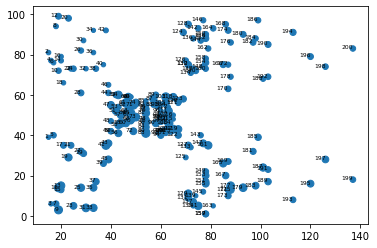

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=z)
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val, y_val, str(i+1), fontsize=6, ha='right')

Text(0.5, 0.92, '3D Plot of X, Y, and Z')

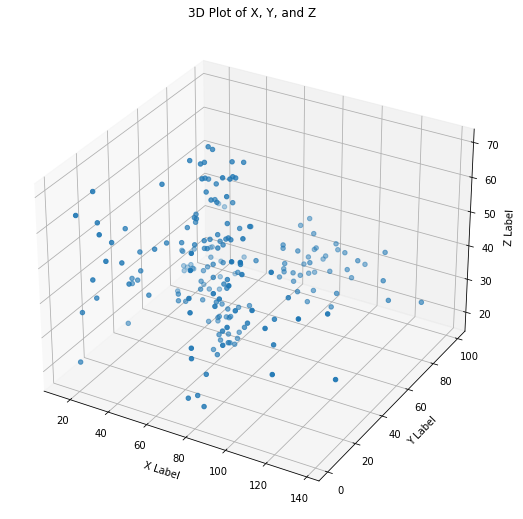

In [7]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Plot of X, Y, and Z')

### Create Dendrogram

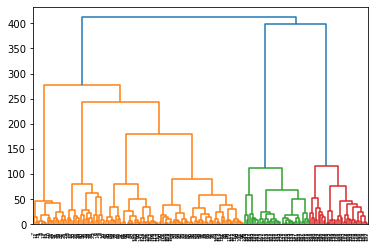

In [8]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(data,method = 'ward'))
plt.show()

### Model training

In [9]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3)
pred= model.fit_predict(data)

In [10]:
data["prediction"] = pred
data.head()

,Age,Income,Score,prediction
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Text(0, 0.5, 'Score')

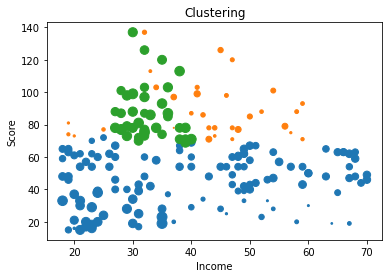

In [11]:
G1 = data[data["prediction"] == 0 ]
G2 = data[data["prediction"] == 1 ]
G3 = data[data["prediction"] == 2 ]
plt.scatter(G1.Age,G1.Income,G1.Score)
plt.scatter(G2.Age,G2.Income,G2.Score)
plt.scatter(G3.Age,G3.Income,G3.Score)
plt.title("Clustering")
plt.xlabel("Income")
plt.ylabel("Score")

Text(0.5, 0.92, '3D Plot of X, Y, and Z')

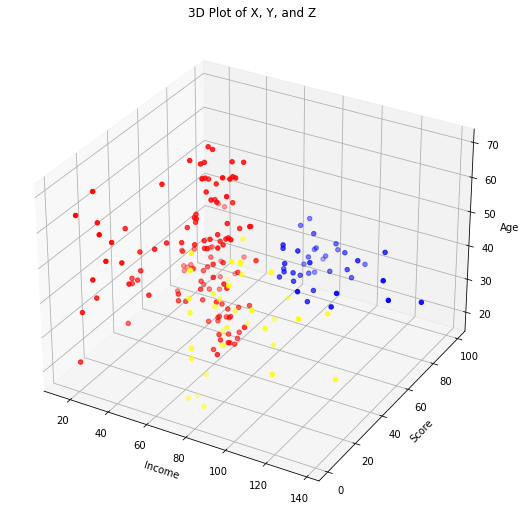

In [13]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')



ax.scatter(G1.Income,G1.Score,G1.Age,color="red")
ax.scatter(G2.Income,G2.Score,G2.Age,color= "yellow")
ax.scatter(G3.Income,G3.Score,G3.Age,color="blue")


ax.set_xlabel('Income')
ax.set_ylabel('Score')
ax.set_zlabel('Age')
ax.set_title('3D Plot of X, Y, and Z')